

### 1. Business Understanding

In this notebook we want to answer 3 questions about Data Scientists and Machine Learning Specialists:

    • What were the most used languages in 2019?
    • What are most desired languages for 2020?
    • What are the mean/median salary and the salary distribution in Brazil?
    
These 3 question were important to me to decide what language start to learn and to know what is the real salary range in the Data Science area.

### 2. Data Understanding

To answer this questions, I used the 'Stackoverflow Survey 2019' dataset 'survey_results_public_2019.csv':

    • It is a survey conducted annually by Stackoverflow
    • The survey contains 85 questions about many subjects like:
        
        • Age, Gender
        • Languages, Databases, Frameworks used in 2019 and desired for 2020
        • Academic Education
        • Current position
        • Many others
        
    • In 2019, almost 90.000 developers answered the survey

In 'survey_results_schema_2019.csv' we can found the name of each column (question) and its meaning

It can be found at Kaggle: https://www.kaggle.com/mchirico/stack-overflow-developer-survey-results-2019

### 3. Prepare Data


Due to the fact that I want to evaluate only Data Scientists or Machine Learning Specialists, I had to do this following steps:

    1. Import Libraries
        1.1. Import Pandas to manipulate the data
        1.2. Import Matplotlib.Pyplot and Seaborn to visualize the data
    2. Import datasets
    3. Drop all rows with missing values in 'DevType' column
    4. Filter only rows that contains 'Data scientist or machine learning specialist' in 'DevType' column

In [14]:
# Importing libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Importing data

df_2019 = pd.read_csv('survey_results_public_2019.csv')
df_2019_schema = pd.read_csv('survey_results_schema_2019.csv')

In [16]:
# Total number of responses

df_2019.shape

(88883, 85)

In [17]:
# Filtering the data of Data Scientists or Machine Learning Specialists

df_2019_clean = df_2019.dropna(subset=['DevType'])
df_2019_clean_DS = df_2019_clean[df_2019_clean['DevType'].str.contains('Data scientist or machine learning specialist')]

In [18]:
# Total number of responses with no missing values in 'DevType' column

df_2019_clean.shape

(81335, 85)

In [19]:
# Total number of 'Data scientist or machine learning specialist' in the survey

df_2019_clean_DS.shape

(6460, 85)

In [20]:
# Total number of 'Data scientist or machine learning specialist' from Brazil

df_2019_clean_DS[df_2019_clean_DS['Country'] == 'Brazil'].shape

(147, 85)

#### Conclusions about the data:

    • The survey contains 88.883 responses
    • 81.335 with no missing values in 'DevType' columns
    • Only 6.460 (7,3% - over 88.883) are 'Data scientist or machine learning specialist'
    • Only 147 (2,3% - over 6.460) are from Brazil

### 4. Modeling Data 

### 4.1 For questions 1 and 2 about languages (and technologies)

#### What were the most used languages in 2019?
#### What are most desired languages for 2020?

Here I followed this steps:

    • Created a function that:
    
        • Drops missing values of columns that I want to analyze
        • Transforms the data in these columns from 'Python; C; C++' to 'Python', 'C', 'C++', for example
        
            • Or any strings separated by ';'
            
        • Counts how many times each string appears in each column
        • Selects and plots top 10 of each column
        
The function was used to evaluate these data:

    • Languages, Databases, Platforms, Webframeworks and Framework in two parameters:
    
        • Most used in 2019
        • Most desired for 2020

In [24]:
# Defining a function that performs the cleaning of the data present in a specific column and builds a top 10 ranking plot

def ranking(df_original, columns, legends, titles):
    
    '''
    INPUT:
    df_original - dataframe that contains a column that you want to analyze
    columns - column that you want to analyze -> LanguageWorkedWith for example
    columns - the name you want to show in plot
    title - title plot
    
    OUTPUT:
    A top 10 ranking bar plot
    '''
    
    for i in range(len(columns)):
    
        # Cleaning missing data of column1

        lg_series = df_original[columns[i]].dropna().reset_index().drop('index', axis=1)
        lg_df = pd.DataFrame(lg_series)

        lg = []

        # Separating the column1 information -> Example: 'Python; C' to 'Python' and 'C'

        for j in range(lg_df.shape[0]):
            lgs = lg_df[columns[i]][j].split(';')
            for k in range(len(lgs)):
                lg.append(lgs[k])

        # Counting values of each option

        if i == 0:
            df_language1 = pd.DataFrame(pd.DataFrame(lg)[0].value_counts() / len(lg_df))
            df_language1.columns = [legends[i]]
        else:
            df_language2 = pd.DataFrame(pd.DataFrame(lg)[0].value_counts() / len(lg_df))
            df_language2.columns = [legends[i]]
     
    # Creating subplots
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
    fig.tight_layout(pad=10)
    
    # Plotting the data
    
    df_language1[:10].plot(kind="barh", alpha=0.5, ax=ax1, title=titles[0])
    df_language2[:10].plot(kind="barh", alpha=0.5, ax=ax2, title=titles[1])
    ax1.invert_yaxis()
    ax2.invert_yaxis()
    
    return fig,ax1,ax2

#### What were the most used languages in 2019?
#### What are most desired languages for 2020?

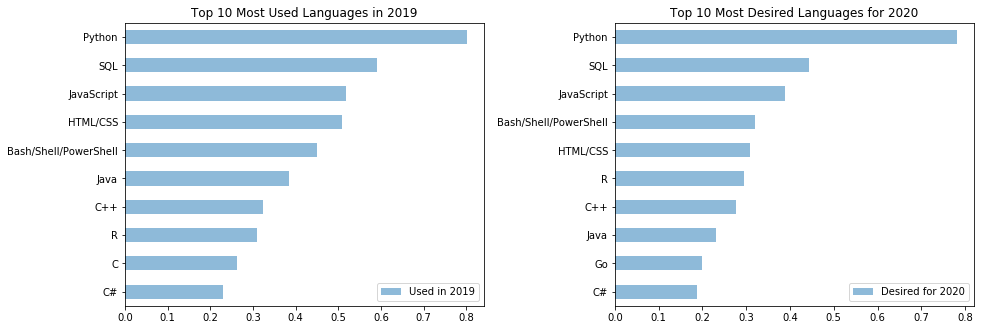

In [28]:
# TOP 10 LANGUAGES

columns=['LanguageWorkedWith', 'LanguageDesireNextYear']
legends=['Used in 2019', 'Desired for 2020']
titles=['Top 10 Most Used Languages in 2019', 'Top 10 Most Desired Languages for 2020']

plot = ranking(df_2019_clean_DS, columns, legends, titles)

#### The sections below talk about Databases, Platforms, Webframeworks and Frameworks

It's just an extra information. It's not the focus of this notebook.

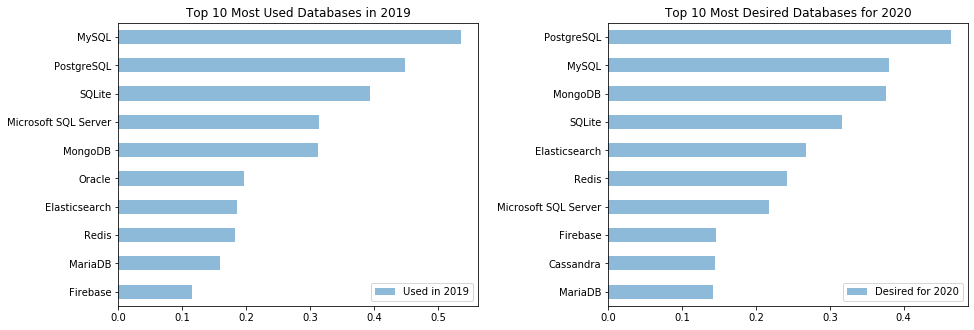

In [32]:
# TOP 10 DATABASES

columns=['DatabaseWorkedWith', 'DatabaseDesireNextYear']
legends=['Used in 2019', 'Desired for 2020']
titles=['Top 10 Most Used Databases in 2019', 'Top 10 Most Desired Databases for 2020']

plot = ranking(df_2019_clean_DS, columns, legends, titles)

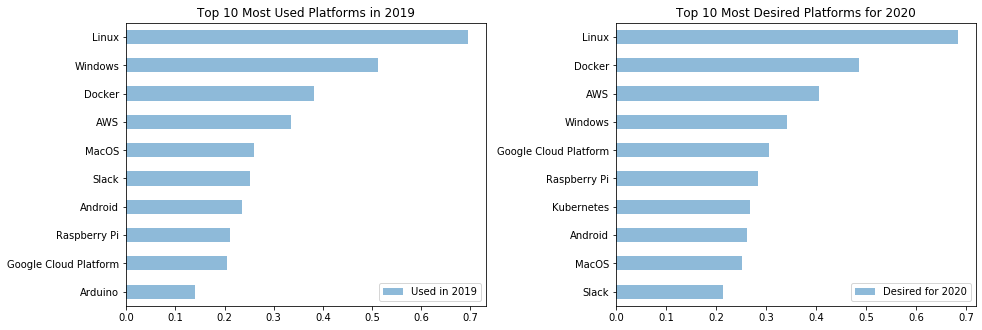

In [33]:
# TOP 10 PLATFORMS

columns=['PlatformWorkedWith', 'PlatformDesireNextYear']
legends=['Used in 2019', 'Desired for 2020']
titles=['Top 10 Most Used Platforms in 2019', 'Top 10 Most Desired Platforms for 2020']

plot = ranking(df_2019_clean_DS, columns, legends, titles)

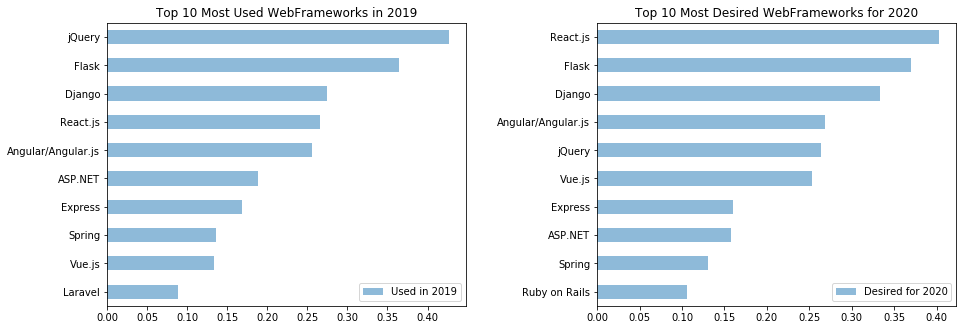

In [34]:
# TOP 10 WEBFRAMEWORKS

columns=['WebFrameWorkedWith', 'WebFrameDesireNextYear']
legends=['Used in 2019', 'Desired for 2020']
titles=['Top 10 Most Used WebFrameworks in 2019', 'Top 10 Most Desired WebFrameworks for 2020']

plot = ranking(df_2019_clean_DS, columns, legends, titles)

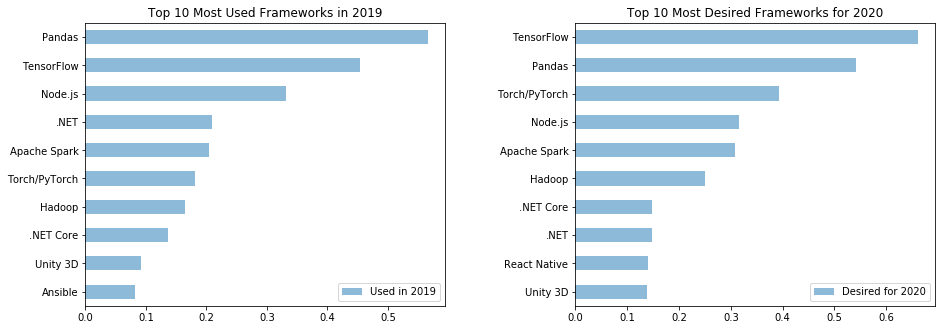

In [35]:
# TOP 10 FRAMEWORKS

columns=['MiscTechWorkedWith', 'MiscTechDesireNextYear']
legends=['Used in 2019', 'Desired for 2020']
titles=['Top 10 Most Used Frameworks in 2019', 'Top 10 Most Desired Frameworks for 2020']

plot = ranking(df_2019_clean_DS, columns, legends, titles)

### 4.2 For question 3 about salaries in Brazil

#### What are the mean/median salary and the salary distribution in Brazil?

Here I followed this steps:

    • Filtered the data about Brazilian Developers
    
        • Remembering that there were 147 brazilian developers in the dataset
    
    • Converted the annual salary in USD to monthly salary in R$ (premise: 1 USD ~ 5 R$)
    • Plotted a salary distribution and mean/median salary

In [30]:
# Cleaning missing values of Annual Salary ('ConvertedComp') column

df_2019_DS_Salary = df_2019_clean_DS.dropna(subset=['ConvertedComp'])

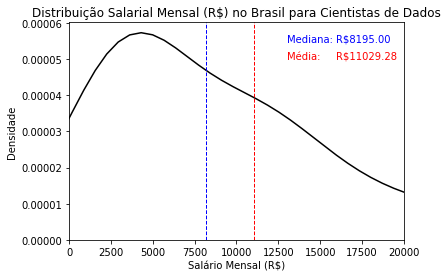

In [31]:
# Plotting the mean/median salary and salaries distribuition of Data Scientists and Machine Learning Specialists

plt.xlim(0,20000)
sns.distplot(df_2019_DS_Salary[df_2019_DS_Salary['Country'] == 'Brazil']['ConvertedComp'] / 12 * 5, hist = False, color='k', bins=200)
plt.xlabel('Salário Mensal (R$)')
plt.ylabel('Densidade')
plt.axvline(df_2019_DS_Salary[df_2019_DS_Salary['Country'] == 'Brazil']['ConvertedComp'].median() / 12 * 5, color='b', linestyle='dashed', linewidth=1)
plt.annotate('Mediana: R${:.2f}'.format(df_2019_DS_Salary[df_2019_DS_Salary['Country'] == 'Brazil']['ConvertedComp'].median()/12*5), xy=(13000, 0.000055), color='b')
plt.axvline(df_2019_DS_Salary[df_2019_DS_Salary['Country'] == 'Brazil']['ConvertedComp'].mean() / 12 * 5, color='r', linestyle='dashed', linewidth=1)
plt.annotate('Média:     R${:.2f}'.format(df_2019_DS_Salary[df_2019_DS_Salary['Country'] == 'Brazil']['ConvertedComp'].mean()/12*5), xy=(13000, 0.00005), color='r')
plt.title('Distribuição Salarial Mensal (R$) no Brasil para Cientistas de Dados')
plt.show()

### 5. Evaluating

Looking at the plots in section 4, we can conclude that:

    • Question 1:

        • Python was the most used language by Data Scientists and Machine Learning Specialists in 2019
    
    • Question 2:
    
        • Python is the most desired language by Data Scientists and Machine Learning Specialists for 2020
    
    • Question 3 (about Data Scientists and Machine Learning Specialists in Brazil):
    
        • The mean salary is R$11.029,28
    • The median salary is R$8.195,00
        • The great concentration is between R$4.500,00 and R$7.500,00